K-means clustering

In [147]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

In [150]:
# K-means clustering Algorithm
import random
class K_means():
  def __init__(self,X,n_clusters):
    self.X = X
    self.feature_cols = X.columns
    self.cluster_count = n_clusters
    self.random_init_points = pd.DataFrame([])
    self.get_random_inits()
    b=self.random_init_points[self.random_init_points.duplicated()]
    if b.shape[0]>0:
      self.get_random_inits()
    self.cluster_tags = self.get_tags()
    rows = self.X.shape[0]
    self.X['assigned_cluster'] = np.zeros(rows)
    for tag in self.cluster_tags:
            s = "distance_to_" + tag
            self.X[s] = np.zeros(rows)
    self.random_init_points.reset_index(inplace=True)
    self.random_init_points.drop("index",axis =1,inplace=True)
    self.distance_tags =[]
    for tag in self.cluster_tags:
      s = "distance_to_" + tag
      self.distance_tags.append(s)

  def get_random_inits(self):
    l = list(self.X.index.to_series().values)
    temp =random.sample(l,self.cluster_count )
    l=[]
    for i in temp:
      l.append(self.X.iloc[i])
    self.random_init_points = pd.DataFrame(l)
 
 
  def get_tags(self):
    tag_dict= {0:"zero ", 1:"one ",2:"two ",3:"three ",4:"four ", 5:"five ", 6:"six ",7:"seven ",8:"eight ",9:"nine "}
    l = []
    if self.cluster_count < 2:
        print ("[i] Number of clusters less than 2, this model is broken! reinitialise it with 2 or more clusters")
        return    
    mod = self.cluster_count
    for cluster_number in range (mod):
      Temp = cluster_number
      s=[]
      w = ""
      for digits in range(len(str(cluster_number))):     
        mod = Temp % 10
        Temp = Temp / 10
        s.append(tag_dict[mod])
      s.reverse()
      for i in s:
        w = w + i
      w = w.rstrip()
      l.append(w)
    return l
 
  def get_euclidean(self):
    for dist_to_point in self.distance_tags:
      self.X[dist_to_point] = np.sqrt((np.square(self.X - self.random_init_points.iloc[self.distance_tags.index(dist_to_point)])).sum(axis=1))  
    return
 
  def assign_cluster(self):
    for m in self.X.index.to_series().values:
      min_point=self.distance_tags.index(self.X[self.distance_tags].iloc[m][self.X[self.distance_tags].iloc[m] == self.X[self.distance_tags].iloc[m].min()].index[0])
      self.X.iloc[m]['assigned_cluster'] = min_point
    return

  def shift_centroid(self):
    for cluster in self.X.assigned_cluster.values:
      self.random_init_points.iloc[int(cluster)]=self.X[self.feature_cols][self.X['assigned_cluster']== cluster].mean()
    return

  def cost(self):
    c = 0
    for cluster in range(len(self.distance_tags)):
      c = c + self.X[self.distance_tags][self.X["assigned_cluster"]== cluster].values.sum()
    return c

  def create_clusters(self):
    prev_cost =0 
    iter = 0 
    cost = 1
    while prev_cost != cost:
      # step 1 get euclidean distance
      self.get_euclidean()
      # step 2 centriod closest among all to this point becomes the centroid for this point
      self.assign_cluster()
      # calculate mean of all points in a cluster and shift centroid to mean
      self.shift_centroid()
      prev_cost = cost
      cost = self.cost()
      iter = iter + 1
    print("[i] Iterations: ",iter)
    print("[i] Cost: ",cost)  
    return

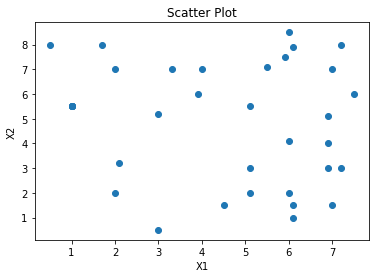

,0,1
0,2.1,3.2
1,6.0,8.5
2,6.0,2.0
3,5.9,7.5
4,7.5,6.0


In [180]:
X =pd.DataFrame([[0.5,8],[1,5.5],[1.7,8],[2,7],[3.3,7],[3.9,6],[4,7],[1,5.5],[2,2],[2.1,3.2],[1,5.5],[3,0.5],[1,5.5],[3,5.2],[1,5.5],[4.5,1.5],[5.1,5.5],[5.5,7.1],[5.9,7.5],[6,8.5],[6.1,7.9],[7,7],[6.9,5.1],[7.2,8],[7.5,6],[5.1,2],[5.1,3],[6.1,1.5],[6,2],[6,4.1],[6.1,1],[6.9,3],[6.9,4],[7,1.5],[7.2,3]])
plt.scatter(X[0],X[1])
plt.title("Scatter Plot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
df = pd.DataFrame(X.iloc[:,:].values)
K = K_means(df,5)
# every time the object is invoked random points are chosen as init
K.random_init_points

In [181]:
K.create_clusters()

[i] Iterations:  7
[i] Cost:  691.7461113051469


In [182]:
K.X

,0,1,assigned_cluster,distance_to_zero,distance_to_one,distance_to_two,distance_to_three,distance_to_four
0,0.5,8.0,0.0,2.995439,5.792932,8.017763,3.150445,7.443118
1,1.0,5.5,0.0,0.458428,5.710346,5.834983,2.506481,6.041523
2,1.7,8.0,3.0,2.955107,4.595439,7.352179,2.163236,6.440497
3,2.0,7.0,3.0,2.073079,4.334904,6.340113,1.369418,5.643580
4,3.3,7.0,3.0,2.840362,3.056914,5.757129,0.471645,4.560702
5,3.9,6.0,3.0,2.850027,2.908274,4.612974,0.810392,3.498571
6,4.0,7.0,3.0,3.390819,2.378667,5.545001,0.855832,4.031129
7,1.0,5.5,0.0,0.458428,5.710346,5.834983,2.506481,6.041523
8,2.0,2.0,0.0,3.189460,7.103383,3.383346,4.707549,5.371220
9,2.1,3.2,0.0,2.091090,6.119754,3.622779,3.533455,4.903060


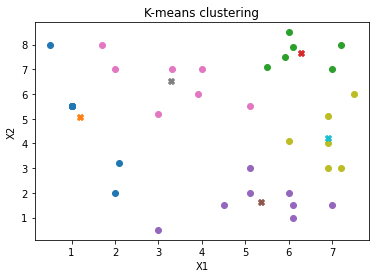

In [183]:
#Plot Visualization
plt.scatter(K.X[0][K.X['assigned_cluster']==0],K.X[1][K.X['assigned_cluster']==0])
plt.scatter(K.random_init_points.iloc[0][0],K.random_init_points.iloc[0][1],marker="X")
plt.scatter(K.X[0][K.X['assigned_cluster']==1],K.X[1][K.X['assigned_cluster']==1])
plt.scatter(K.random_init_points.iloc[1][0],K.random_init_points.iloc[1][1],marker="X")
plt.scatter(K.X[0][K.X['assigned_cluster']==2],K.X[1][K.X['assigned_cluster']==2])
plt.scatter(K.random_init_points.iloc[2][0],K.random_init_points.iloc[2][1],marker="X")
plt.scatter(K.X[0][K.X['assigned_cluster']==3],K.X[1][K.X['assigned_cluster']==3])
plt.scatter(K.random_init_points.iloc[3][0],K.random_init_points.iloc[3][1],marker="X")
plt.scatter(K.X[0][K.X['assigned_cluster']==4],K.X[1][K.X['assigned_cluster']==4])
plt.scatter(K.random_init_points.iloc[4][0],K.random_init_points.iloc[4][1],marker="X")
plt.title("K-means clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()